In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [106]:
df = pd.read_csv('spam.tsv', sep='\t')

In [107]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [108]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [109]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [110]:
labels_count = df['label'].value_counts()
print(labels_count)

label
ham     4825
spam     747
Name: count, dtype: int64


In [111]:
labels_count / len(df) * 100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

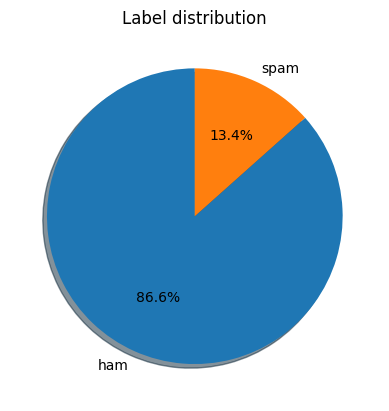

In [112]:
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Label distribution')
plt.show()


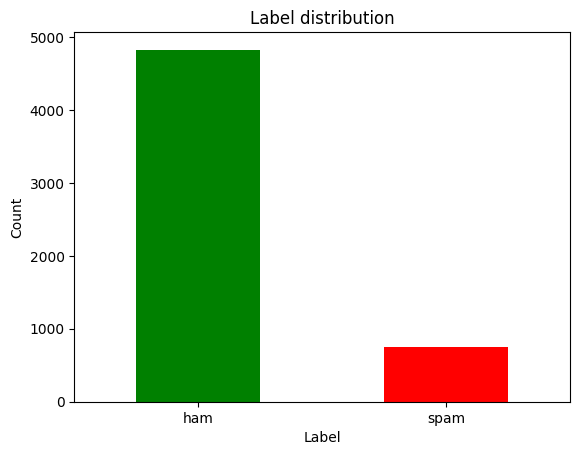

In [113]:
labels_count.plot(kind='bar', rot=0, color=['g', 'r'])
plt.title('Label distribution')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()



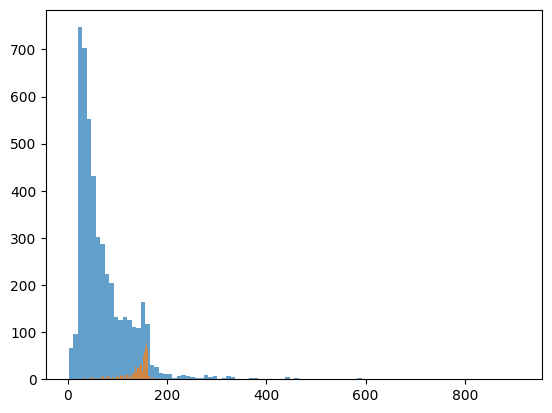

In [114]:
plt.hist(df[df['label'] == 'ham']['length'], bins=100, alpha=0.7, label='Ham')
plt.hist(df[df['label'] == 'spam']['length'], bins=100, alpha=0.7, label='Spam')
plt.show()

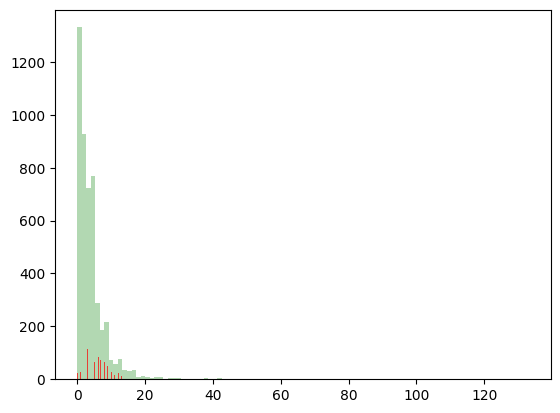

In [115]:
plt.hist(df[df['label'] == 'ham']['punct'], bins=100, alpha=0.3, label='Ham', color='green')
plt.hist(df[df['label'] == 'spam']['punct'], bins=100, alpha=0.7, label='Spam', color='red')
plt.show()


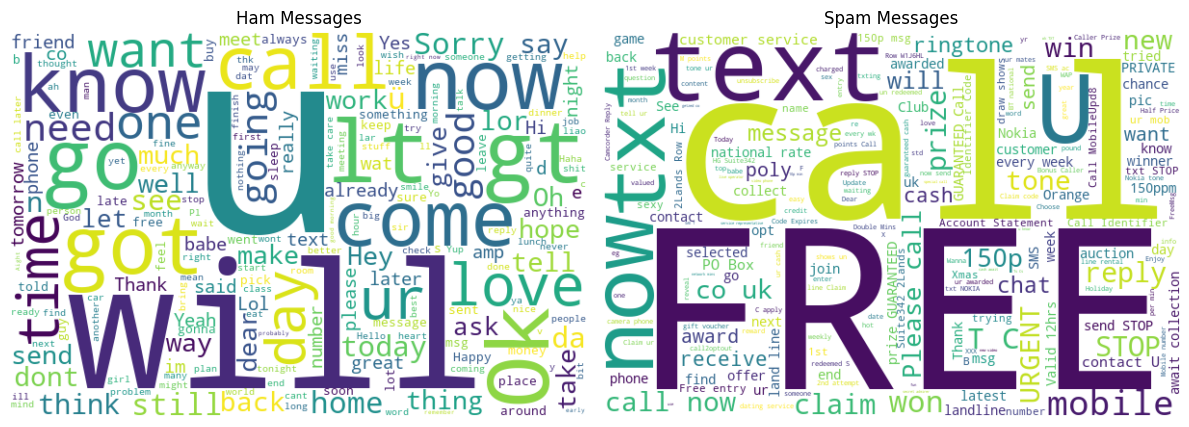

In [116]:
from wordcloud import WordCloud

# Separate messages into 'ham' and 'spam'
ham_messages = df[df['label']=='ham']['message']
spam_messages = df[df['label']=='spam']['message']

# Generate word clouds for 'ham' and 'spam'
ham_wordcloud = WordCloud(width=600, height=400, background_color='white') \
    .generate(' '.join(ham_messages))
spam_wordcloud = WordCloud(width=600, height=400, background_color='white') \
    .generate(' '.join(spam_messages))

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(ham_wordcloud, interpolation='bilinear')
axes[0].set_title('Ham Messages')
axes[0].axis('off')

axes[1].imshow(spam_wordcloud, interpolation='bilinear')
axes[1].set_title('Spam Messages')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [117]:
# undersampling first to balance the training dataset
ham_df = df[df['label'] == 'ham']
spam_df = df[df['label'] == 'spam']
print(len(ham_df), len(spam_df))
ham_df = ham_df.sample(spam_df.shape[0], random_state=42)
print(len(ham_df), len(spam_df))


4825 747
747 747


In [118]:
ham_df.head()

,label,message,length,punct
3714,ham,If i not meeting ü all rite then i'll go home ...,84,4
1311,ham,"I.ll always be there, even if its just in spir...",103,6
548,ham,"Sorry that took so long, omw now",32,1
1324,ham,I thk 50 shd be ok he said plus minus 10.. Did...,84,3
3184,ham,Dunno i juz askin cos i got a card got 20% off...,111,3


In [119]:
data = pd.concat([ham_df, spam_df], ignore_index=True)
data.head()

,label,message,length,punct
0,ham,If i not meeting ü all rite then i'll go home ...,84,4
1,ham,"I.ll always be there, even if its just in spir...",103,6
2,ham,"Sorry that took so long, omw now",32,1
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...,84,3
4,ham,Dunno i juz askin cos i got a card got 20% off...,111,3


In [120]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [121]:
data.head()

,label,message,length,punct
0,ham,If i not meeting ü all rite then i'll go home ...,84,4
1,ham,"I.ll always be there, even if its just in spir...",103,6
2,ham,"Sorry that took so long, omw now",32,1
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...,84,3
4,ham,Dunno i juz askin cos i got a card got 20% off...,111,3


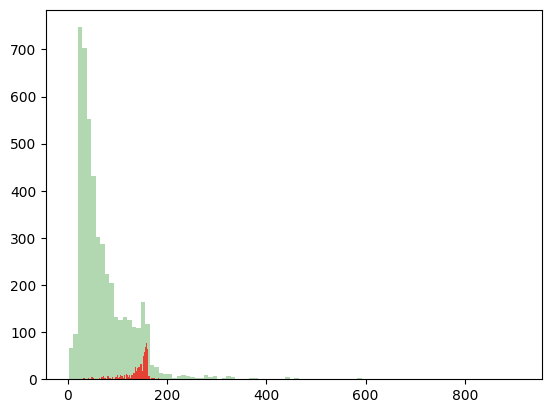

In [122]:
plt.hist(df[df['label'] == 'ham']['length'], bins=100, alpha=0.3, label='Ham', color='green')
plt.hist(df[df['label'] == 'spam']['length'], bins=100, alpha=0.7, label='Spam', color='red')
plt.show()

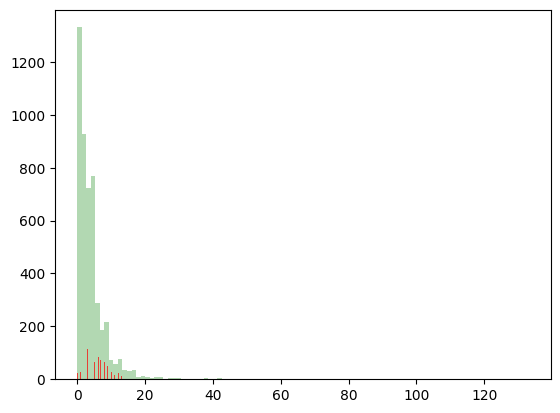

In [123]:
plt.hist(df[df['label'] == 'ham']['punct'], bins=100, alpha=0.3, label='Ham', color='green')
plt.hist(df[df['label'] == 'spam']['punct'], bins=100, alpha=0.7, label='Spam', color='red')
plt.show()

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1494 non-null   object
 1   message  1494 non-null   object
 2   length   1494 non-null   int64 
 3   punct    1494 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.8+ KB


# Split Data into Training and Testing

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split( \
    data['message'], data['label'], test_size=0.3, random_state=0)

In [127]:
X_train.shape, X_test.shape

((1045,), (449,))

# Building Models

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [129]:
rf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=1000))])

In [130]:
rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_estimators=1000))])

# Predicitng Results

In [131]:
y_pred = classifier.predict(X_test)
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 

In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [133]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [134]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 23, 199]], dtype=int64)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [143]:
import joblib

joblib.dump(rf, 'rf_pipeline.pkl')



['rf_pipeline.pkl']

In [144]:
rf_pipeline = joblib.load('rf_model.pkl')

In [145]:
rf_pipeline.predict(['Hi, how are you?'])

array(['ham'], dtype=object)